# **Fundamentos de Data Science**
# **Examen de Certificación: Intento 3**

## **Analizando la Rotación de Clientes en Telecomunicaciones**

### **Requisitos:**

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

El dataset puede ser encontrado [aquí](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

### **1. Limpieza de datos con Python:**
- Identificar y solucionar cualquier valor duplicado.
- Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
- Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
- Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
- Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

### **2. Exploración de datos con Python:**
- Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


### **Sobre el Dataset**

### **Contexto**

TELCO, una compañía de servicios de telecomunicaciones, busca predecir el comportamiento de sus clientes para implementar estrategias efectivas de retención. A través del análisis de los datos de clientes, TELCO pretende desarrollar programas específicos de fidelización que puedan reducir la tasa de deserción de usuarios.

### **Contenido**

Cada fila representa un cliente de TELCO, y cada columna contiene atributos del cliente, detallados en la sección de Metadatos de columnas.

**El dataset incluye información sobre:**

- Clientes que se dieron de baja en el último mes – la columna se denomina Churn.

- Servicios contratados por cada cliente – teléfono, líneas múltiples, internet, seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico y streaming de TV y películas.

- Información de la cuenta del cliente – tiempo como cliente, tipo de contrato, método de pago, facturación sin papel, cargos mensuales y cargos totales.
Información demográfica de los clientes – género, rango de edad, y si tienen pareja o dependientes.

- Este conjunto de datos permite a TELCO evaluar factores asociados a la permanencia o baja de los clientes para mejorar su servicio y diseñar estrategias de retención efectivas.

In [4]:
import pandas as pd

# CARGAR EL DATASET

cust_churn_data_path = r'C:\Users\Andy\Documents\Examen\Data\Telco_Customer_Churn.csv'
telco_df = pd.read_csv(cust_churn_data_path)

# Información básica del dataset
info_basica = telco_df.info()

# Número de filas y columnas
num_filas, num_columnas = telco_df.shape

# Mostrar nombres de las columnas
nombres_columnas = telco_df.columns
telco_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Limpieza de datos

In [10]:
# Identificar duplicados en el conjunto de datos de TELCO
duplicados = telco_df.duplicated()

# Contar la cantidad de duplicados encontrados
cantidad_duplicados = duplicados.sum()

# Eliminar los duplicados y mantener el primer registro
telco_df = telco_df.drop_duplicates()

cantidad_duplicados

np.int64(0)

In [8]:
# Obtener valores únicos para cada columna categórica en el conjunto de datos de TELCO
columnas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod', 'Churn']

# Crear un diccionario para almacenar los valores únicos de cada columna categórica
valores_unicos = {col: telco_df[col].unique().tolist() for col in columnas_categoricas}

# Mostrar los valores únicos de cada columna categórica al usuario
valores_unicos

{'gender': ['Female', 'Male'],
 'Partner': [True, False],
 'Dependents': [False, True],
 'PhoneService': [False, True],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': [True, False],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': [False, True]}

In [9]:
# Definir el diccionario de tipos de datos para cada columna
diccionario_tipos_telco = {
    'customerID': 'string',
    'gender': 'category',
    'SeniorCitizen': 'int64',
    'Partner': 'bool',
    'Dependents': 'bool',
    'tenure': 'int64',
    'PhoneService': 'bool',
    'MultipleLines': 'category',
    'InternetService': 'category',
    'OnlineSecurity': 'category',
    'OnlineBackup': 'category',
    'DeviceProtection': 'category',
    'TechSupport': 'category',
    'StreamingTV': 'category',
    'StreamingMovies': 'category',
    'Contract': 'category',
    'PaperlessBilling': 'bool',
    'PaymentMethod': 'category',
    'MonthlyCharges': 'float64',
    'TotalCharges': 'float64',  # Convertir después de tratar valores nulos
    'Churn': 'bool'
}

# Tratar los valores nulos en 'TotalCharges' antes de convertir a float
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce').fillna(0)

# Convertir las columnas con valores 'Yes' y 'No' a booleano
columnas_booleanas = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in columnas_booleanas:
    telco_df[col] = telco_df[col].map({'Yes': True, 'No': False})

# Aplicar los tipos de datos al resto del DataFrame según el diccionario
telco_df = telco_df.astype(diccionario_tipos_telco)

# Verificar los tipos de datos aplicados
print(telco_df.dtypes)

customerID          string[python]
gender                    category
SeniorCitizen                int64
Partner                       bool
Dependents                    bool
tenure                       int64
PhoneService                  bool
MultipleLines             category
InternetService           category
OnlineSecurity            category
OnlineBackup              category
DeviceProtection          category
TechSupport               category
StreamingTV               category
StreamingMovies           category
Contract                  category
PaperlessBilling              bool
PaymentMethod             category
MonthlyCharges             float64
TotalCharges               float64
Churn                         bool
dtype: object


In [13]:
# Verificar la cantidad de valores faltantes en todas las columnas del DataFrame
valores_faltantes_total = telco_df.isnull().sum()
valores_faltantes_total

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

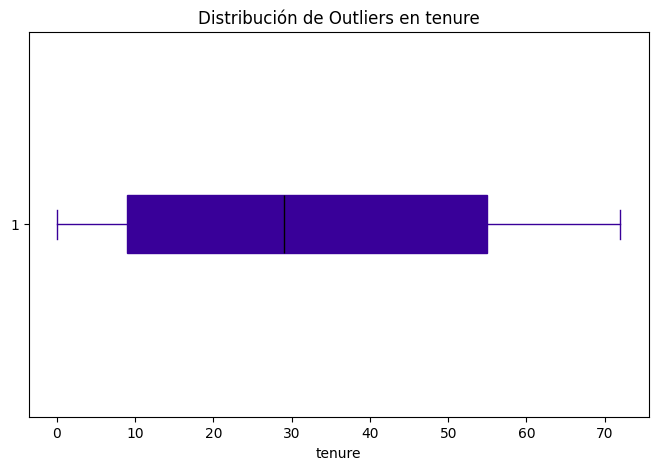

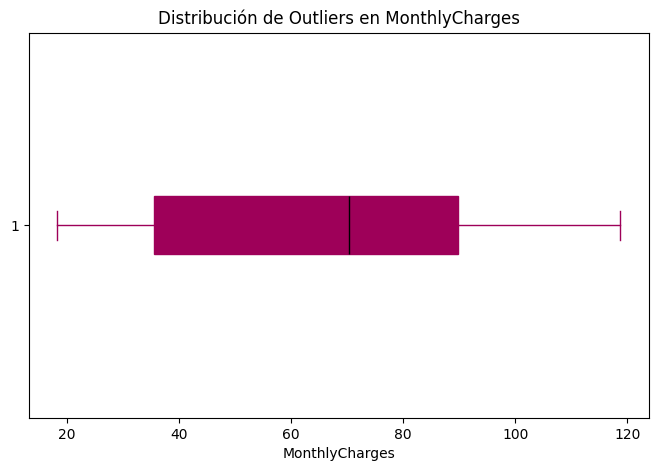

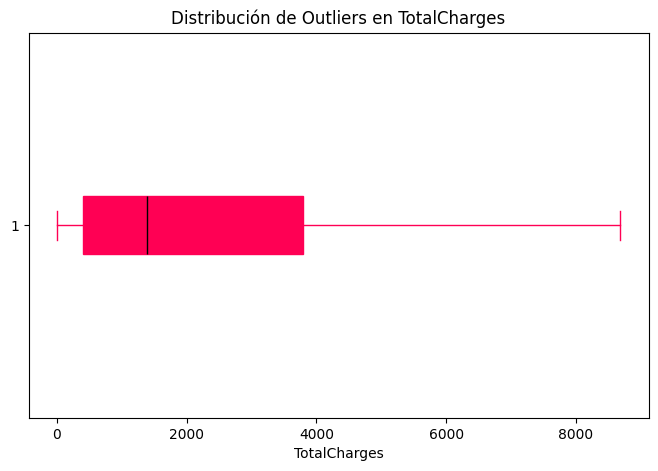

In [16]:
# Generar gráfico de boxplot para visualizar outliers
import matplotlib.pyplot as plt

# Definir colores
colores = ['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00']

# Crear boxplots para visualizar los outliers en las columnas numéricas
for i, col in enumerate(columnas_numericas):
    plt.figure(figsize=(8, 5))
    plt.boxplot(telco_df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor=colores[i], color=colores[i]),
                capprops=dict(color=colores[i]),
                whiskerprops=dict(color=colores[i]),
                flierprops=dict(markerfacecolor=colores[i], markeredgecolor=colores[i]),
                medianprops=dict(color='black'))
    plt.title(f'Distribución de Outliers en {col}')
    plt.xlabel(col)
    plt.show()

''' 
INTERPRETACIÓN

# Tenure (Tiempo como cliente):
La mayoría de los clientes tienen una antigüedad uniforme 
de hasta 72 meses, sin presencia de outliers claros. 
Los valores cercanos a 0 podrían indicar clientes nuevos, 
pero no son considerados atípicos según el gráfico.


# MonthlyCharges (Cargos mensuales):
Los cargos mensuales oscilan entre aproximadamente 18 y 120, 
con algunos valores extremos en ambos límites. 
Estos podrían corresponder a clientes con paquetes de 
servicios básicos o premium, lo que explica la variabilidad 
sin indicar necesariamente anomalías.


# TotalCharges (Cargos totales):
Los cargos totales varían considerablemente, alcanzando 
hasta los 8,000, sin que existan outliers destacados. 
Los valores bajos cercanos a 0 probablemente corresponden a 
clientes nuevos o con menor tiempo de suscripción, 
mientras que los valores altos reflejan clientes 
de mayor antigüedad o con múltiples servicios.
'''

### Exploración de datos

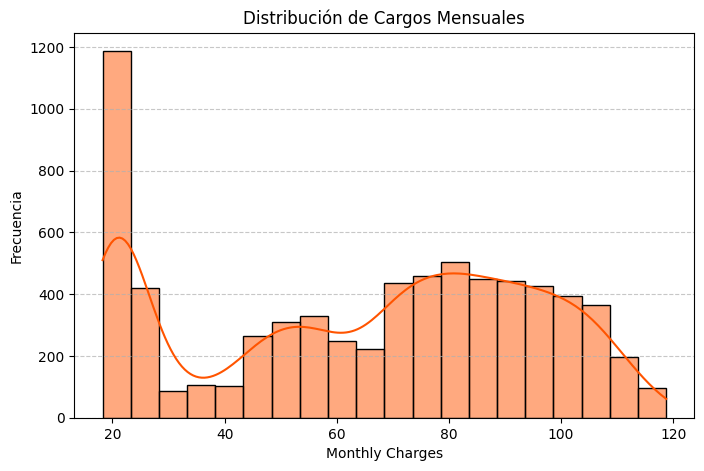


Interpretación: La distribución de los cargos mensuales muestra concentraciones en niveles bajos 
y en un segundo pico entre 70 y 100. Esto indica una base de clientes con distintos niveles de servicio, 
desde planes básicos hasta premium, sin valores atípicos extremos fuera de estos rangos.



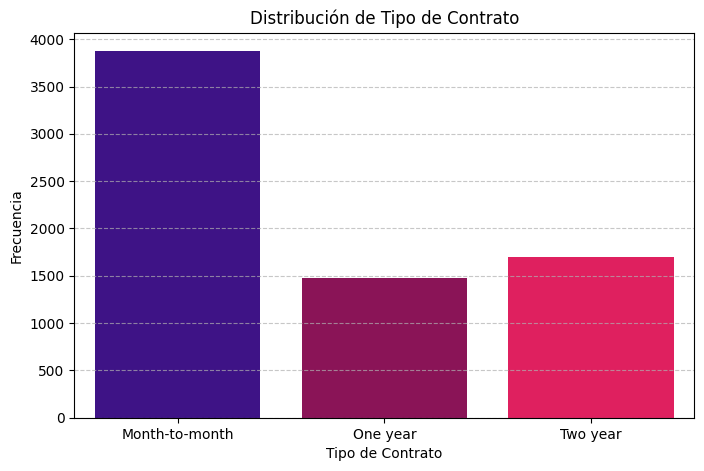


Interpretación: El contrato de tipo 'Month-to-month' predomina, lo cual sugiere una preferencia 
por la flexibilidad. TELCO podría considerar incentivos para estos clientes a corto plazo para 
incrementar la retención o promocionar contratos de mayor duración.



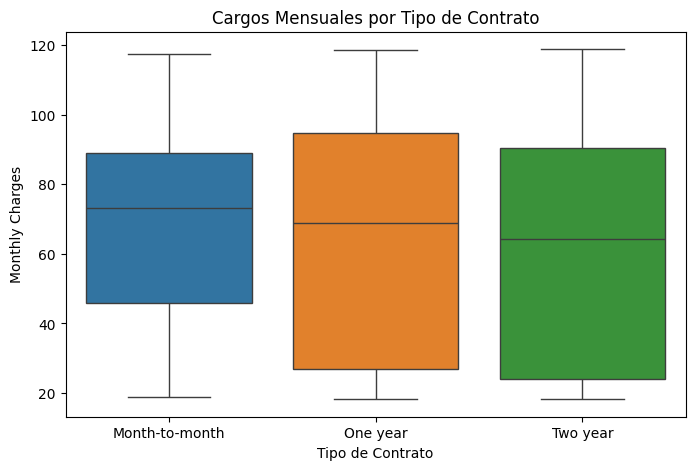


Interpretación: Los clientes con contratos de uno o dos años tienden a pagar tarifas mensuales 
más bajas, lo cual sugiere descuentos por fidelidad. La mayor variabilidad de cargos en contratos 
mensuales indica una posible personalización en función del uso de servicios.



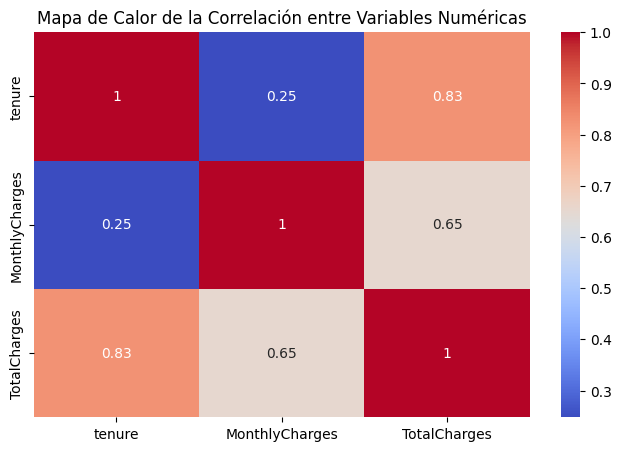


Interpretación: Existe una fuerte correlación entre 'tenure' y 'TotalCharges', lo cual es 
esperado ya que los cargos se acumulan con la permanencia. La correlación entre 'MonthlyCharges' 
y 'TotalCharges' indica que los ingresos totales están también ligados a la antigüedad y el uso.



In [38]:
import seaborn as sns

# VISUALIZACIONES UNIVARIADAS

# 1. Histograma de 'MonthlyCharges'
plt.figure(figsize=(8, 5))
sns.histplot(data=telco_df, x='MonthlyCharges', bins=20, kde=True, color='#ff5400')
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Monthly Charges')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("""
Interpretación: La distribución de los cargos mensuales muestra concentraciones en niveles bajos 
y en un segundo pico entre 70 y 100. Esto indica una base de clientes con distintos niveles de servicio, 
desde planes básicos hasta premium, sin valores atípicos extremos fuera de estos rangos.
""")

# 2. Gráfico de barras para 'Contract'
plt.figure(figsize=(8, 5))
sns.countplot(data=telco_df, x='Contract', hue='Contract', palette=['#390099', '#9e0059', '#ff0054'])
plt.title('Distribución de Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("""
Interpretación: El contrato de tipo 'Month-to-month' predomina, lo cual sugiere una preferencia 
por la flexibilidad. TELCO podría considerar incentivos para estos clientes a corto plazo para 
incrementar la retención o promocionar contratos de mayor duración.
""")

# VISUALIZACIONES MULTIVARIADAS

# 3. Boxplot de 'MonthlyCharges' por 'Contract' con `hue`
plt.figure(figsize=(8, 5))
sns.boxplot(x='Contract', y='MonthlyCharges', data=telco_df, hue='Contract', dodge=False)
plt.title('Cargos Mensuales por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Monthly Charges')
plt.show()

print("""
Interpretación: Los clientes con contratos de uno o dos años tienden a pagar tarifas mensuales 
más bajas, lo cual sugiere descuentos por fidelidad. La mayor variabilidad de cargos en contratos 
mensuales indica una posible personalización en función del uso de servicios.
""")

# 4. Mapa de calor de correlación entre variables numéricas (no requiere `hue`)
plt.figure(figsize=(8, 5))
correlation_matrix = telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()

print("""
Interpretación: Existe una fuerte correlación entre 'tenure' y 'TotalCharges', lo cual es 
esperado ya que los cargos se acumulan con la permanencia. La correlación entre 'MonthlyCharges' 
y 'TotalCharges' indica que los ingresos totales están también ligados a la antigüedad y el uso.
""")